# Problem Set 3
Xinhe Wang

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines

## Question 0

#### Links to data files

- The link to 2015 RECS microdata file is [sas](https://www.eia.gov/consumption/residential/data/2015/sas/recs2015_public_v4.zip) or [csv](https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv).

- The link to 2009 RECS microdata file is [sas](https://www.eia.gov/consumption/residential/data/2009/sas/recs2009_public_v4.zip) or [csv](https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv). 

- The link to 2009 RECS microdata replicate weights is [sas](https://www.eia.gov/consumption/residential/data/2009/sas/recs2009_public_repweights_sas7bdat.zip) or [csv](https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv).

#### Variables 

Variables that are needed to estimate the desired means:

- For the 2015 RECS data:

| Variable name | Description |
|:-----------|:------------|
|DOEID	|Unique identifier for each respondent|
|REGIONC	|Census Region|
|HDD65	|	Heating degree days in 2015, base temperature 65F|
|CDD65	|	Cooling degree days in 2015, base temperature 65F|
|NWEIGHT	|Final sample weight|
|BRRWTXX | Balanced repeated replicate weight, "XX" ranges from 1 to 96 |

- For the 2009 RECS data:

| Variable name | Description |
|:-----------|:------------|
|DOEID	|Unique identifier for each respondent|
|REGIONC	|Census Region|
|HDD65|	Heating degree days in 2009, base temperature 65F|
|CDD65|	Cooling degree days in 2009, base temperature 65F|
|NWEIGHT|	Final sample weight|
|brr_weight_XX | Balanced repeated replicate weight, "XX" ranges from 1 to 244 |



#### Links to instruction files

- The link to the instruction file for 2015 RECS microdata is [here](https://www.eia.gov/consumption/residential/data/2015/pdf/microdata_v3.pdf)

- The link to the instruction file for 2009 RECS microdata is [here](https://www.eia.gov/consumption/residential/methodology/2009/pdf/using-microdata-022613.pdf)


#### Using replicate weights to estimate standard errors

To estimate standard errors of the estimator, RECS adopts Fay's method of the balanced repeated replication technique. This method is introduced in [Residential Energy Consumption Survey (RECS): Using the 2015 microdata file to compute estimates and standard errors (RSEs)](https://www.eia.gov/consumption/residential/data/2015/pdf/microdata_v3.pdf) and [Residential Energy Consumption Survey (RECS): Using the 2009 microdata file to compute estimates and standard errors (RSEs)](https://www.eia.gov/consumption/residential/methodology/2009/pdf/using-microdata-022613.pdf).

Suppose that $\theta$ is a population parameter that we are interested in. Let $\hat\theta$ be the estimate from the full sample, which means that $\hat\theta$ is an average of observations weighted by the final sampling weight. Let $\hat\theta_{r}$ be the estimate from the $r$-th replicate subsample using replicate weights, $r=1,\ldots, R$, where $R$ is the number of replicate samples. Let $\epsilon\in [0,1)$ be the Fay coefficient and $\epsilon=0.5$ for the 2015 and 2009 RECS. Then the standard error (i.e. the variance of $\hat\theta$) is estimated by

$$ \textrm{SD}(\hat\theta) = \left( \frac{1}{R(1-\epsilon)^2} \sum_{r=1}^R (\hat\theta_{r} - \hat\theta)^2 \right)^{\frac{1}{2}}.$$




## Question 1
#### a) Construct datasets without replicate weights

In [2]:
# Download and read files

def read_file(name, url):
    """
    Read a local csv file if it exists locally and read it from a given url
    otherwise.

    Parameters
    ----------
    name : string
        file path.
    url : string
        the url that the file can be downloaded or read from.

    Returns
    -------
    pandas.DataFrame
        data from the desired file.

    """
    if os.path.exists(name):
        return pd.read_csv(name, low_memory=False)
    else:
        return pd.read_csv(url, low_memory=False)

    
path = '/Users/xinhew/Downloads/'

u = 'https://www.eia.gov/consumption/residential/data/2015/csv/' + \
    'recs2015_public_v4.csv'
df2015 = read_file(path + 'recs2015_public_v4.csv', u)

u = 'https://www.eia.gov/consumption/residential/data/2009/csv/' + \
    'recs2009_public.csv'
df2009 = read_file(path + 'recs2009_public.csv', u)

u = 'https://www.eia.gov/consumption/residential/data/2009/csv/' + \
    'recs2009_public_repweights.csv'
df2009rep = read_file(path + 'recs2009_public_repweights.csv', u)

In [3]:
# Keep necessary columns
index = ['DOEID', 'REGIONC', 'HDD65', 'CDD65', 'NWEIGHT']
brr2015 = ['BRRWT' + str(num) for num in range(97)[1:]]
data2015 = df2015.loc[:, index]

brr2009 = ['brr_weight_' + str(num) for num in range(245)[1:]]
data2009 = df2009.loc[:, index]
df2009rep = df2009rep.loc[:, ['DOEID'] + brr2009]

In [4]:
# Rename columns
names = dict(zip(index, ['id', 'region', 'heat_dd', 'cool_dd', 'final_wt']))
data2015 = data2015.rename(columns=names)
data2009 = data2009.rename(columns=names)

In [5]:
# Convert types
int_index = ['id', 'heat_dd', 'cool_dd']
data2015[int_index] = data2015[int_index].astype(int)

c_index = ['region']
data2015[c_index] = data2015[c_index].astype('category')

int_index = ['id', 'heat_dd', 'cool_dd']
data2009[int_index] = data2009[int_index].astype(int)

c_index = ['region']
data2009[c_index] = data2009[c_index].astype('category')

In [6]:
# Replace categorical values
d = {1: "Northeast",
     2: "Midwest",
     3: "South",
     4: "West"}
data2015[['region']] = data2015[['region']].replace(d)
data2009[['region']] = data2009[['region']].replace(d)

In [7]:
data2015.head()

,id,region,heat_dd,cool_dd,final_wt
0,10001,West,2031,1768,12085.16227
1,10002,South,1915,2795,14410.19627
2,10003,South,2263,2235,23325.95385
3,10004,Midwest,3754,1374,12165.33319
4,10005,Northeast,5401,993,16717.67092


In [8]:
data2009.head()

,id,region,heat_dd,cool_dd,final_wt
0,1,Midwest,4742,1080,2471.68
1,2,West,2662,199,8599.17
2,3,Northeast,6233,505,8969.92
3,4,Midwest,6034,672,18003.64
4,5,Northeast,5388,702,5999.61


#### b) Construct datasets containing ids and replicate weights

In [9]:
# Convert type and rename columns
df2009rep = df2009rep.rename(columns={'DOEID': 'id'})
int_index = ['id']
df2009rep[int_index] = df2009rep[int_index].astype(int)

In [10]:
# Dataset for 2009
repwt2009 = pd.DataFrame(df2009rep[brr2009].stack(), columns=['brr_weight'])
t = [[x] * 244 for x in list(df2009rep.loc[:, 'id'])]
repwt2009[['id']] = [item for sublist in t for item in sublist]
repwt2009 = repwt2009[['id', 'brr_weight']]
repwt2009.head()

id   brr_weight
0 brr_weight_1   1  3628.305158
  brr_weight_2   1  1392.373673
  brr_weight_3   1  1271.181424
  brr_weight_4   1  3528.052756
  brr_weight_5   1  3478.045539

In [11]:
# Dataset for 2009
repwt2015 = pd.DataFrame(df2015[brr2015].stack(), columns=['brr_weight'])
t = [[x] * 96 for x in list(data2015.loc[:, 'id'])]
repwt2015[['id']] = [item for sublist in t for item in sublist]
repwt2015 = repwt2015[['id', 'brr_weight']]
repwt2015.head()

id    brr_weight
0 BRRWT1  10001  16555.311270
  BRRWT2  10001   5938.014320
  BRRWT3  10001  17725.586130
  BRRWT4  10001  17635.591890
  BRRWT5  10001   6032.801451

## Question 2
#### a) Estimate the average number of heating and cooling degree days

In [12]:
# Point estimates
def point_est(df, wt='final_wt'):
    """
    Compute point estimates of the average number of heating and cooling 
    degree days of different Census regions using data and weights.

    Parameters
    ----------
    df : pandas.DataFrame
        survey data with columns named as 'region' for Census regions,
        'heat_dd' and 'cool_dd' for heating and cooling degree days,
        and wt for final or replicate weights.
    wt : string, optional
        weight used for this point estimation. The default is 'final_wt'.

    Returns
    -------
    pandas.DataFrame
        point estimations the average number of heating and cooling 
        degree days of different Census region.

    """
    dft = pd.DataFrame({'hdd * wt': df['heat_dd'] * df[wt],
                        'cdd * wt': df['cool_dd'] * df[wt]})
    dft[['region']] = df[['region']]

    wtdsum = dft.groupby("region").sum()
    wtsum = df.groupby("region").sum()[wt]
    wtavg = {'heating degree days': wtdsum['hdd * wt'] / wtsum,
             'cooling degree days': wtdsum['cdd * wt'] / wtsum}
    return pd.DataFrame(wtavg)

est2015 = point_est(data2015)
est2009 = point_est(data2009)

In [13]:
# Standard errors
estrep2015 = pd.DataFrame()
for rwt in brr2015:
    estrep2015 = estrep2015.append(
        point_est(pd.concat([data2015, df2015[rwt]], axis=1), wt=rwt)
        )

se2015 = (estrep2015.groupby("region").var(ddof=0) + \
          (estrep2015.groupby("region").mean() - est2015) ** 2 \
         ) ** 0.5 * 2

In [14]:
estrep2009 = pd.DataFrame()
for rwt in brr2009:
    estrep2009 = estrep2009.append(
        point_est(pd.concat([data2009, df2009rep[rwt]], axis=1), wt=rwt)
        )

se2009 = (estrep2009.groupby("region").var(ddof=0) + \
          (estrep2009.groupby("region").mean() - est2009) ** 2 \
         ) ** 0.5 * 2

In [15]:
# Confidence intervals
low2015 = (est2015
           .sub(1.96 * se2015, axis='index')
           .round(2)
           .astype(str)
           )
up2015 = (est2015
          .add(1.96 * se2015, axis='index')
          .round(2)
          .astype(str)
          )
#for l, c in zip(low2015.items(), up2015.items()):
    #print(l[1])
    #test = pd.DataFrame((l[1],c[1]))
    #print(c[1])
ci2015 = pd.concat(('[' + low2015.iloc[:, 0] + ', ' + up2015.iloc[:, 0] + ']',
                    '[' + low2015.iloc[:, 1] + ', ' + up2015.iloc[:, 1] + ']'),
                   axis=1)
ci2015.columns = ["heating degree days", 
                  "cooling degree days"]

In [16]:
low2009 = (est2009
           .sub(1.96 * se2009, axis='index')
           .round(2)
           .astype(str)
           )
up2009 = (est2009
          .add(1.96 * se2009, axis='index')
          .round(2)
          .astype(str)
          )

ci2009 = pd.concat(('[' + low2009.iloc[:, 0] + ', ' + up2009.iloc[:, 0] + ']',
                    '[' + low2009.iloc[:, 1] + ', ' + up2009.iloc[:, 1] + ']'),
                   axis=1)
ci2009.columns = ["heating degree days", 
                  "cooling degree days"]

In [17]:
# Nicely formatted tables
est2015.round(2).astype(str) + ', 95% CI: ' + ci2015

,heating degree days,cooling degree days
region,,
Midwest,"5785.49, 95% CI: [5634.78, 5936.2]","956.07, 95% CI: [894.42, 1017.72]"
Northeast,"5695.67, 95% CI: [5532.07, 5859.27]","983.92, 95% CI: [918.91, 1048.93]"
South,"2211.88, 95% CI: [2056.24, 2367.52]","2639.85, 95% CI: [2524.7, 2755.0]"
West,"2814.83, 95% CI: [2625.03, 3004.63]","1576.77, 95% CI: [1377.04, 1776.51]"


In [18]:
est2009.round(2).astype(str) + ', 95% CI: ' + ci2009

,heating degree days,cooling degree days
region,,
Midwest,"6325.34, 95% CI: [6233.76, 6416.91]","660.89, 95% CI: [631.99, 689.79]"
Northeast,"5700.99, 95% CI: [5632.2, 5769.78]","680.72, 95% CI: [660.12, 701.31]"
South,"2696.67, 95% CI: [2615.7, 2777.64]","2207.73, 95% CI: [2150.65, 2264.81]"
West,"3259.64, 95% CI: [3092.52, 3426.76]","1328.64, 95% CI: [1270.22, 1387.06]"


#### b) Estimate the change in heating and cooling degree days

In [19]:
# Point estimate
chg_est = est2015.sub(est2009, axis='index')

In [20]:
# Confidence interval
chg_se = (se2015 ** 2 + se2009 ** 2) ** 0.5
low_chg = (chg_est
           .sub(1.96 * chg_se, axis='index')
           .round(2)
           .astype(str)
           )
up_chg = (chg_est
          .add(1.96 * chg_se, axis='index')
          .round(2)
          .astype(str)
          )

ci_chg = pd.concat(('[' + low_chg.iloc[:, 0] + ', ' + up_chg.iloc[:, 0] + ']',
                    '[' + low_chg.iloc[:, 1] + ', ' + up_chg.iloc[:, 1] + ']'),
                   axis=1)
ci_chg.columns = ["heating degree days", 
                  "cooling degree days"]

In [21]:
# A nicely formatted table
chg_est.round(2).astype(str) + ', 95% CI: ' + ci_chg

,heating degree days,cooling degree days
region,,
Midwest,"-539.85, 95% CI: [-716.2, -363.49]","295.19, 95% CI: [227.1, 363.27]"
Northeast,"-5.32, 95% CI: [-182.79, 172.16]","303.2, 95% CI: [235.01, 371.4]"
South,"-484.79, 95% CI: [-660.23, -309.35]","432.12, 95% CI: [303.6, 560.65]"
West,"-444.81, 95% CI: [-697.7, -191.92]","248.13, 95% CI: [40.03, 456.23]"


## Question 3

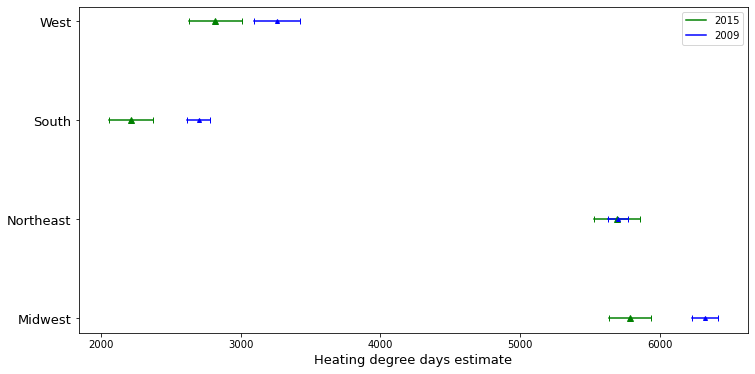

In [22]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)

for lower, upper, y in zip(low2015.iloc[:, 0].astype(float), 
                           up2015.iloc[:, 0].astype(float), 
                           range(4)):
    plt.plot((lower, upper), (y, y), '|-', color='green')
    
for lower, upper, y in zip(low2009.iloc[:, 0].astype(float), 
                           up2009.iloc[:, 0].astype(float), 
                           range(4)):
    plt.plot((lower, upper), (y, y), '|-', color='blue')
    
for est, y in zip(est2015.iloc[:, 0], range(4)):
    plt.plot(est, y, '^', color='green')

for est, y in zip(est2009.iloc[:, 0], range(4)):
    plt.plot(est, y, '^', markersize=4, color='blue')
    
_ = plt.yticks(range(4), ['Midwest', 'Northeast', 'South', 'West'], size=13)
_ = plt.xlabel("Heating degree days estimate", size=13)

gl = lines.Line2D([], [], color='green', label='2015')
bl = lines.Line2D([], [], color='blue', label='2009')
_ = plt.legend(handles=[gl, bl])

plt.show()

Figure 1. Point and 95% confidence interval estimates of average heating degree days for residences in each Census region for both 2009 and 2015.

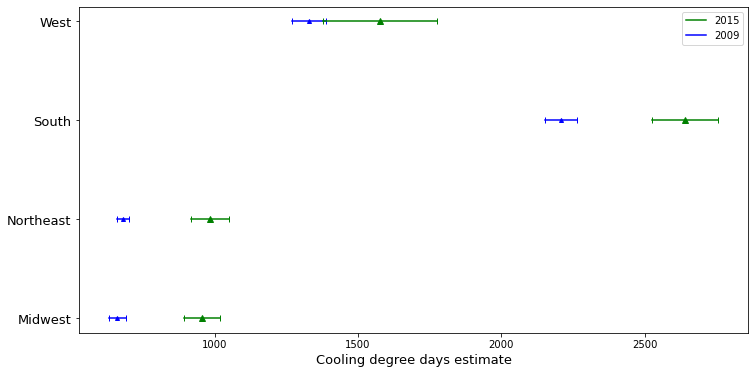

In [23]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)

for lower, upper, y in zip(low2009.iloc[:, 1].astype(float), 
                           up2009.iloc[:, 1].astype(float), 
                           range(4)):
    plt.plot((lower, upper), (y, y), '|-', color='blue')
    
for lower, upper, y in zip(low2015.iloc[:, 1].astype(float), 
                           up2015.iloc[:, 1].astype(float), 
                           range(4)):
    plt.plot((lower, upper), (y, y), '|-', color='green')
    
for est, y in zip(est2009.iloc[:, 1], range(4)):
    plt.plot(est, y, '^', markersize=4, color='blue')

for est, y in zip(est2015.iloc[:, 1], range(4)):
    plt.plot(est, y, '^', color='green')
    
_ = plt.yticks(range(4), ['Midwest', 'Northeast', 'South', 'West'], size=13)
_ = plt.xlabel("Cooling degree days estimate", size=13)

gl = lines.Line2D([], [], color='green', label='2015')
bl = lines.Line2D([], [], color='blue', label='2009')
_ = plt.legend(handles=[gl, bl])

plt.show()

Figure 2. Point and 95% confidence interval estimates of average cooling degree days for residences in each Census region for both 2009 and 2015.

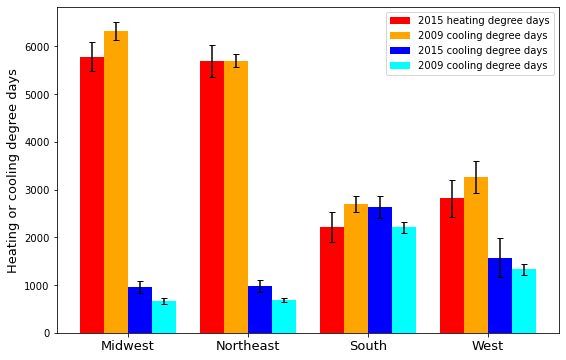

In [24]:
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)

_ = plt.bar(range(4), 
            est2015.iloc[:, 0], 
            yerr=up2015.iloc[:, 0].astype(float) - \
                low2015.iloc[:, 0].astype(float), 
            capsize=3,
            width=0.2, 
            color='red', 
            label='2015 heating degree days')

_ = plt.bar([x + 0.2 for x in range(4)], 
            est2009.iloc[:, 0], 
            yerr=up2009.iloc[:, 0].astype(float) - \
                low2009.iloc[:, 0].astype(float), 
            capsize=3,
            width=0.2, 
            color='orange', 
            label='2009 cooling degree days')

_ = plt.bar([x + 0.4 for x in range(4)], 
            est2015.iloc[:, 1], 
            yerr=up2015.iloc[:, 1].astype(float) - \
                low2015.iloc[:, 1].astype(float), 
            capsize=3,
            width=0.2, 
            color='blue', 
            label='2015 cooling degree days')

_ = plt.bar([x + 0.6 for x in range(4)], 
            est2009.iloc[:, 1], 
            yerr=up2009.iloc[:, 1].astype(float) - \
                low2009.iloc[:, 1].astype(float), 
            capsize=3,
            width=0.2, 
            color='cyan', 
            label='2009 cooling degree days')

_ = plt.xticks([r + 0.3 for r in range(4)], 
               ['Midwest', 'Northeast', 'South', 'West'], 
               size=13)
_ = plt.ylabel('Heating or cooling degree days', size=13)
_ = plt.legend()

plt.show()

Figure 3. Bar plot of point and 95% confidence interval estimates of average heating and cooling degree days for residences in each Census region for both 2009 and 2015.

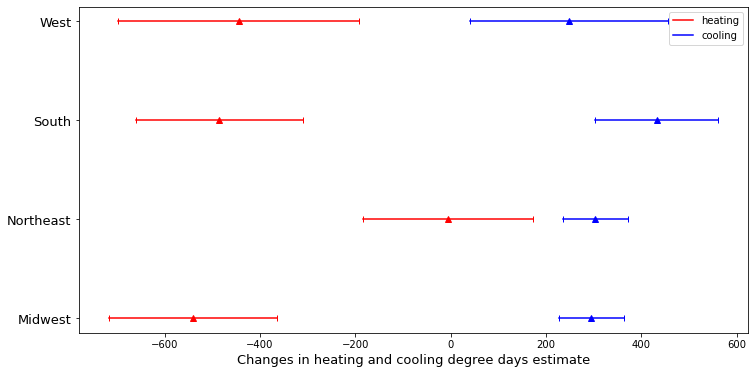

In [25]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)

for lower, upper, y in zip(low_chg.iloc[:, 0].astype(float), 
                           up_chg.iloc[:, 0].astype(float), 
                           range(4)):
    plt.plot((lower, upper), (y, y), '|-', color='red')

for lower, upper, y in zip(low_chg.iloc[:, 1].astype(float), 
                           up_chg.iloc[:, 1].astype(float), 
                           range(4)):
    plt.plot((lower, upper), (y, y), '|-', color='blue')
    
for est, y in zip(chg_est.iloc[:, 0], range(4)):
    plt.plot(est, y, '^', markersize=6, color='red')
    
for est, y in zip(chg_est.iloc[:, 1], range(4)):
    plt.plot(est, y, '^', markersize=6, color='blue')
    
_ = plt.yticks(range(4), ['Midwest', 'Northeast', 'South', 'West'], size=13)
_ = plt.xlabel("Changes in heating and cooling degree days estimate", size=13)

rl = lines.Line2D([], [], color='red', label='heating')
bl = lines.Line2D([], [], color='blue', label='cooling')
_ = plt.legend(handles=[rl, bl])

plt.show()

Figure 4. Point and 95% confidence interval estimates of changes in average heating and cooling degree days for residences in each Census region from 2009 to 2015.

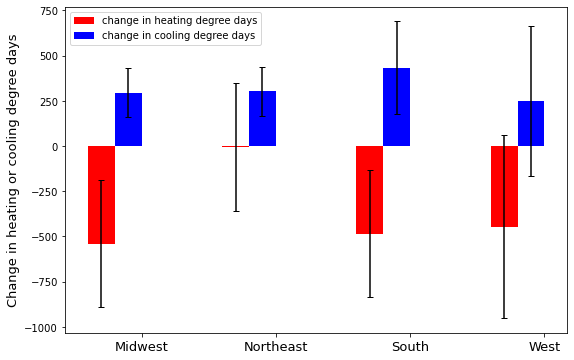

In [26]:
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)

_ = plt.bar(range(4), 
            chg_est.iloc[:, 0], 
            yerr=up_chg.iloc[:, 0].astype(float) - \
                low_chg.iloc[:, 0].astype(float), 
            capsize=3,
            width=0.2, 
            color='red', 
            label='change in heating degree days')

_ = plt.bar([x + 0.2 for x in range(4)], 
            chg_est.iloc[:, 1], 
            yerr=up_chg.iloc[:, 1].astype(float) - \
                low_chg.iloc[:, 1].astype(float), 
            capsize=3,
            width=0.2, 
            color='blue', 
            label='change in cooling degree days')

_ = plt.xticks([r + 0.3 for r in range(4)], 
               ['Midwest', 'Northeast', 'South', 'West'], 
               size=13)
_ = plt.ylabel('Change in heating or cooling degree days', size=13)
_ = plt.legend()

plt.show()

Figure 5. Bar plot of point and 95% confidence interval estimates of changes in average heating and cooling degree days for residences in each Census region from 2009 to 2015.